<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab *4*: *Decision Tree & Random Forest***

###**Tenggat Waktu: 16 Oktober 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab4_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **16 Oktober 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pertanyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/understanding-random-forest-58381e0602d2"]

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


# Dataset

Tugas ini menggunakan <b>Dataset Abalone</b> (dataset.csv) yang sudah disesuaikan dengan keperluan pada tugas kali ini.  
Dataset terdiri dari:
 - 7 atribut 
    * Length – Panjang dari cangkang kerang abalone
    * Diameter – Diameter dari kerang abalone
    * Height – Tinggi dari abalone
    * Whole weight – Berat keseluruhan dari kerang abalone
    * Shucked weight – Berat dari daging kerang abalone
    * Viscera weight – Berat dari organ dalam kerang abalone
    * Shell weight – Berat kerang abalone yang sudah dikeringkan
 - 1 target
    * Class - Kelas dari kerang Abalone
 - 4177 baris data

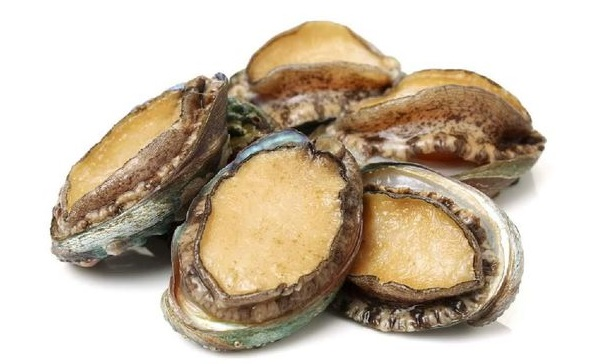

Ilustrasi Kerang Abalone  
Sumber: https://akcdn.detik.net.id/visual/2019/08/22/15cf22b4-fd19-42d3-9a0b-0658358609ca_169.jpeg?w=650

In [3]:
import pandas as pd

# Import data
data = pd.read_csv('dataset.csv')
data.drop(columns=["Sex"], inplace=True)
data.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


In [4]:
label = data['Class'].to_frame() # Label pada data (Untuk diprediksi pada saat klasifikasi)
del data['Class'] # Menghapus label dan menyisakan hanya fitur pada data

In [5]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan 
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.8, random_state=42)

# CART (Classification and Regression Tree)

## Decision Tree

Decision Tree adalah sebuah model yang menggunakan struktur berupa Binary  Tree (Setiap node memiliki maksimal 2 children). Decision Tree digunakan pada data science yang bersifat Supervised Learning (Model akan dibangun menggunakan data training, lalu selanjutnya akan digunakan untuk memprediksi output dari data yang diberikan). Data training yang dilakukan untuk melatih model akan diubah menjadi serangkaian aturan yang berbentuk Binary Tree. Aturan yang didapat tersebut  digunakan untuk proses prediksi pada data yang lainnya.

### Training

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model decision tree
dt_md5 = DecisionTreeClassifier(max_depth=5)
dt_md5.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=5)

### Evaluasi

In [7]:
# Memprediksi data testing
predicted = dt_md5.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8169856459330144
Presisi: 0.6415094339622641
Recall: 0.37158469945355194
F1-score: 0.47058823529411764


### *Hyperparameter*

*Hyperparameter* merupakan parameter yang bisa kita ubah/atur nilainya sebelum kita membangun model yang akan digunakan. Tujuan dari perubahan parameter tersebut adalah untuk menghasilkan model yang harapannya bisa bekerja dengan lebih baik.  

Terdapat beberapa hyperparameter pada berbagai algoritma *machine learning*, salah satunya adalah pada algoritma Decision Tree. *Hyperparameter* yang terdapat pada algoritma  Decision Tree di modul `sklearn.tree` adalah: 
* `criterion` (Kriteria untuk menilai seberapa bagus pemecahan node)
* `max_depth` (Kedalaman maksimal dari Tree), 
* `min_samples_split` (Jumlah sample minimal yang diperlukan untuk memecah suatu internal node)
* dan lain-lain.

Informasi lebih lanjut dapat dilihat pada dokumentasi berikut:
[link text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model decision tree
# Decision tree yang dibangun memiliki hyperparameter max_depth=3
dt_md3 = DecisionTreeClassifier(max_depth=3)
dt_md3.fit(data_train, label_train)

# Memprediksi data testing
predicted = dt_md3.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.7990430622009569
Presisi: 0.5483870967741935
Recall: 0.4644808743169399
F1-score: 0.5029585798816567


Perubahan *hyperparameter* dapat mempengaruhi performa dari model. Pada awalnya dengan `max_depth = 5` model menghasilkan akurasi 81% dan *recall* 37%. Setelah dilakukan perubahan *hyperparameter* dengan `max_depth = 3`, kita dapatkan penurunan pada performa model dengan akurasi 79% namun peningkatan pada *recall* menjadi 46%.

Bagaimana jika angka `max_depth` kita naikkan? Silahkan eksplorasi perubahan *hyperparameter* ini yaa!

### Visualisasi Decision Tree yang Dihasilkan

Kita bisa melakukan visualisasi terhadap serangkaian aturan yang membentuk Decision Tree yang telah dibangun. Salah satu caranya adalah dengan menggunakan modul `sklearn.tree.plot_tree` dengan bantuan `matplotlib`.

Berikut adalah contoh visualisasi decision tree pada dataset iris:

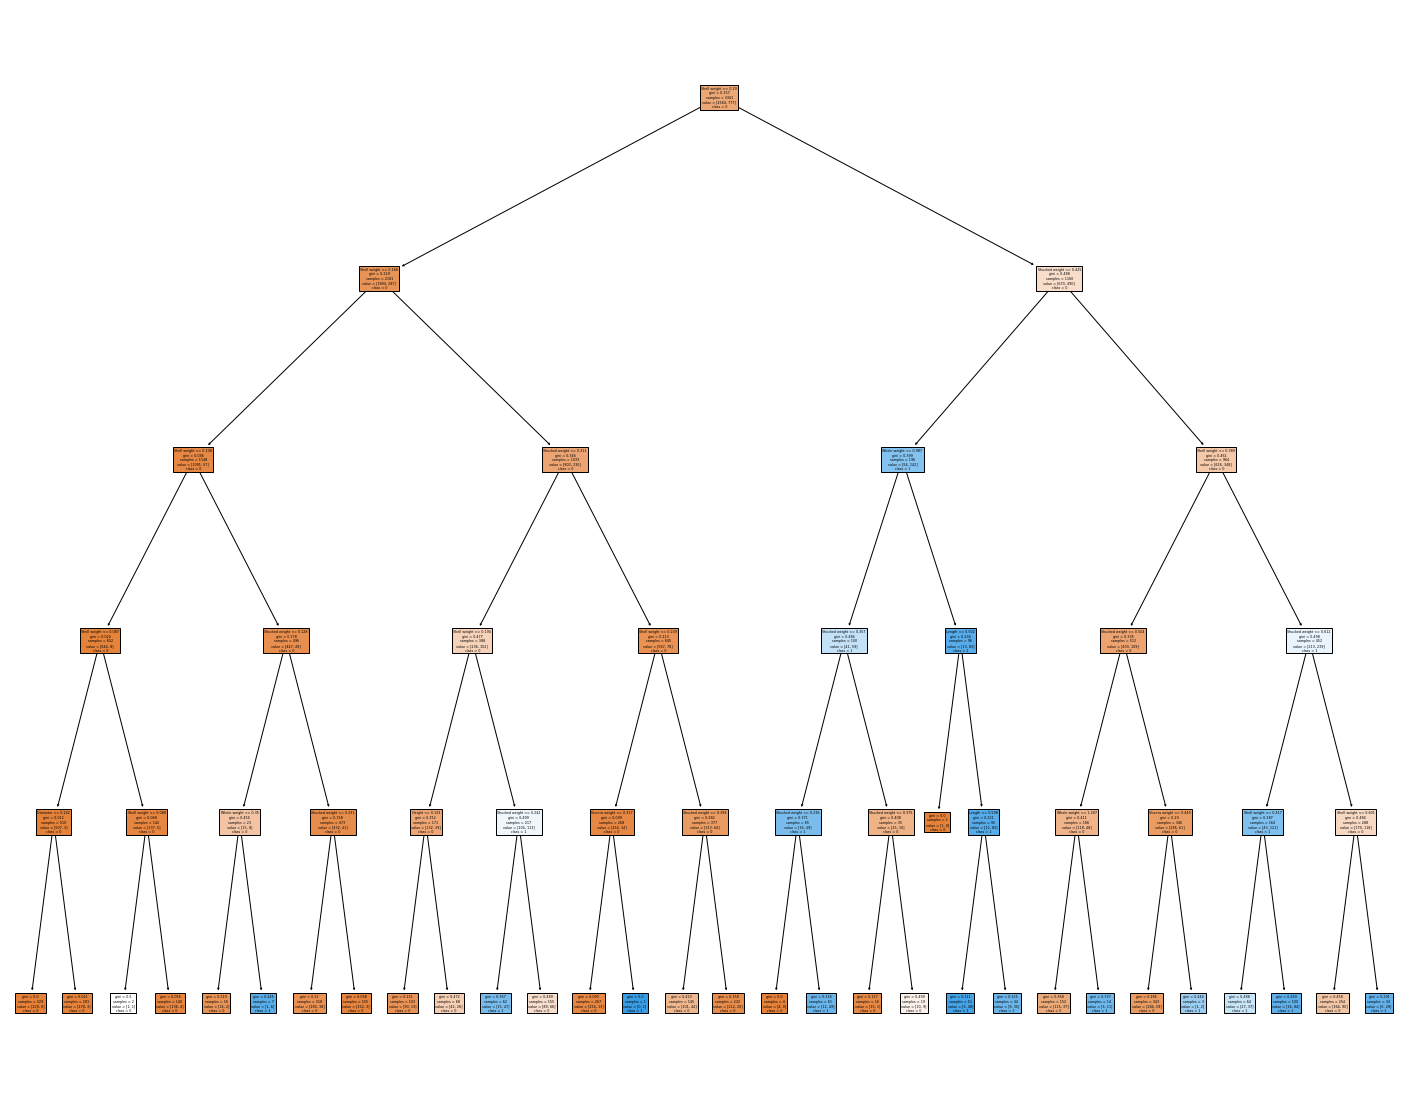

In [9]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md5, feature_names=features, class_names=labels, filled=True)

Dapat dilihat bahwa *decision tree* yang dihasilkan terlihat sangat kompleks. Hal tersebut beresiko untuk terjadi *overfitting* dan juga sulit untuk divisualisasikan. Oleh karena itu, akan perubahan *hyperparameter* pada model decision tree bisa membuat model yang dihasilkan tidak terlalu kompleks.

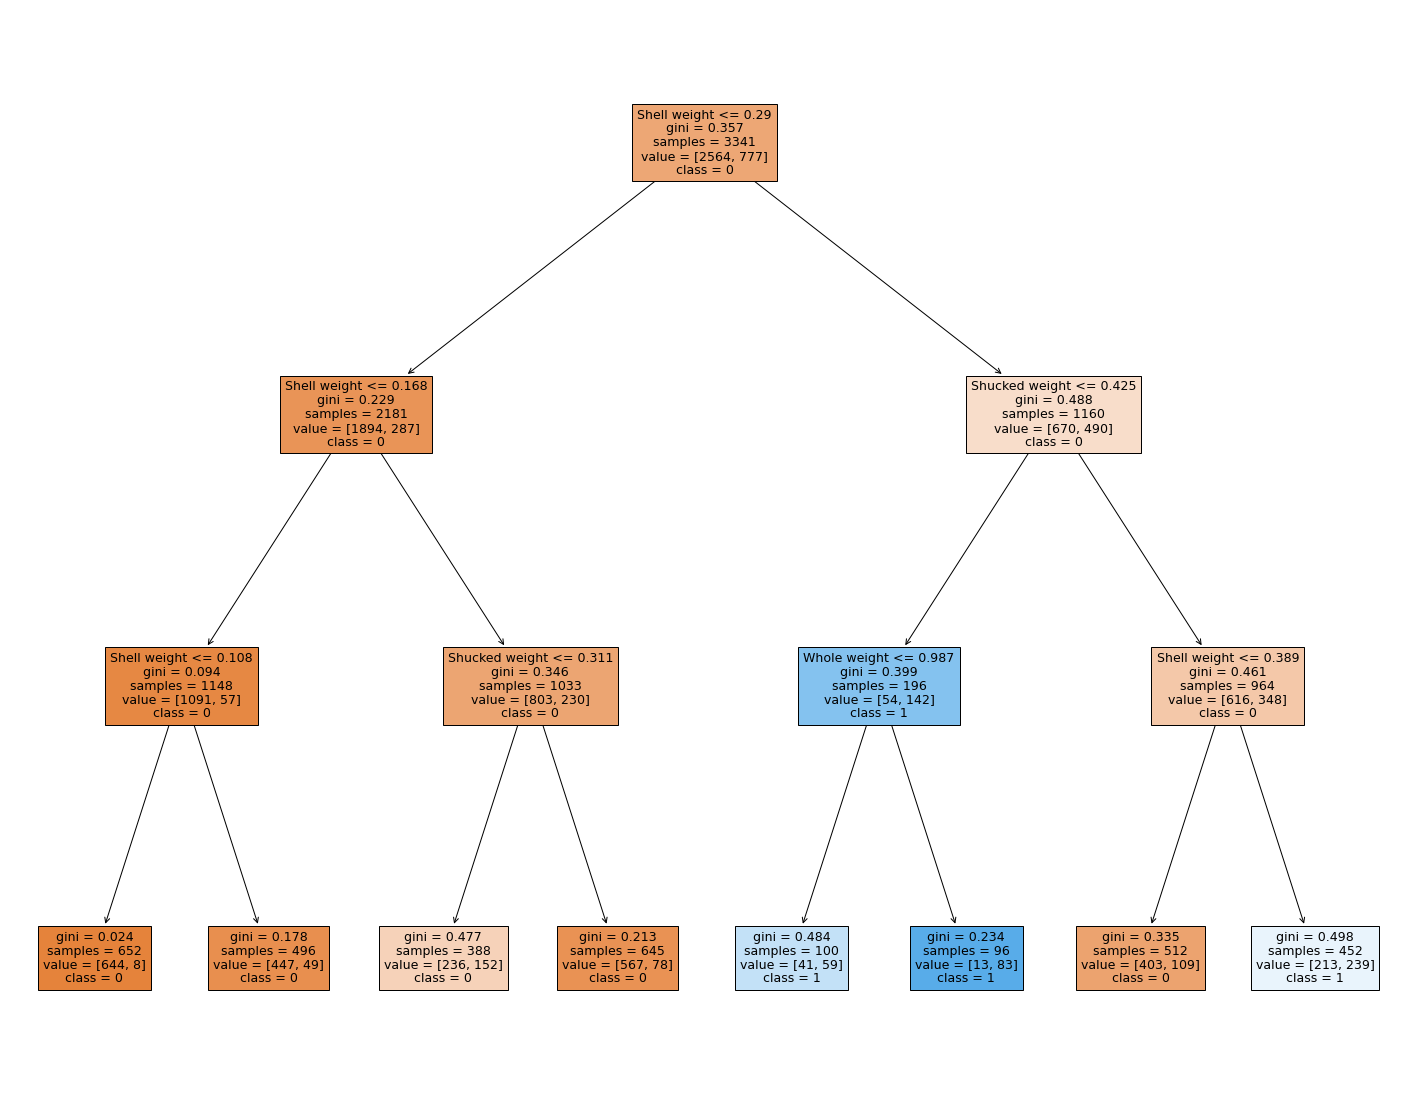

In [10]:
from sklearn import datasets
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Melakukan visualisasi pada decision tree yang sudah dibangun sebelumnya
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md3, feature_names=features, class_names=labels, filled=True)

Pada model decision tree di atas, dilakukan pembatasan pada kedalaman maksimal dengan mengatur nilai dari `max_depth`. Perubahan *hyperparameter* ini dilakukan untuk mendapatkan model dengan jenis yang sama namun atribut yang berbeda. Untuk pemilihan *hyperparameter* apa yang tepat, biasanya memperhatikan persebaran data pada dataset yang diberikan dan dibantu oleh pengalaman dalam melakukan serangkaian kegiatan data science.  

Pemilihan dari *hyperparameter* biasanya disebut sebagai *Hyperparameter Tuning* dan ada metode yang dinamakan Grid Search Cross Validation yang bisa digunakan untuk memilih *hyperparameter* terbaik dari beberapa *hyperparameter* yang disediakan berdasarkan kriteria tertentu. Jika kalian tertarik terkait dengan penerapan Grid Search Cross Validation, silakan mencari dan mempraktikannya sebagai latihan mandiri.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

## Ensemble Learning

*Ensemble Learning* adalah proses di mana kita menggunakan banyak model untuk mendapatkan hasil yang lebih baik dibandingkan dengan menggunakan satu model saja. Salah satu jenis *ensemble learning* adalah *bagging* (*bootstrap aggregating*). 

Pada metode *bagging*, setiap model akan dilatih menggunakan subhimpunan dari data *training* (tidak keseluruhan data latih digunakan dalam setiap proses *training*). Pada subhimpunan data yang satu dengan yang lainnya bisa mengandung data yang sama (tidak harus beda semua), hal inilah yang disebut dengan *bootstrap sampling*. Nantinya, setiap model yang telah dilatih akan melakukan proses prediksi terhadap data yang baru. Hasil prediksi akhir didapatkan melalui sistem *majority voting* di mana hasil akhirnya akan menggunakan hasil prediksi yang paling banyak muncul pada model-model yang telah dibuat.

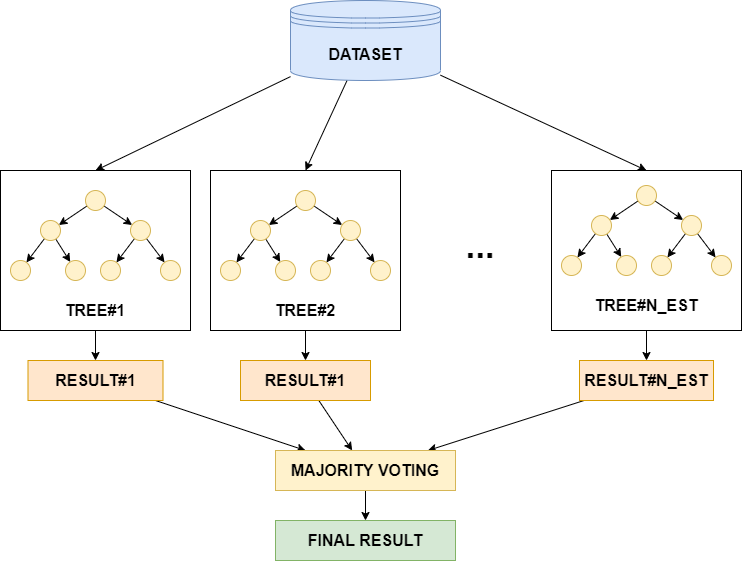

Sumber: Olahan Pribadi

## *Random Forest*

*Random Forest* merupakan salah satu variasi dari konsep *bagging* pada *ensemble learning* yang menggunakan Decision Tree sebagai basis modelnya. Setiap model yang dibangun berupa Decision Tree dan nantinya model tersebut dilatih dan digunakan untuk melakukan prediksi. Output dari Random Forest itu sendiri merupakan hasil prediksi yang paling banyak muncul diantara model-model Decision Tree.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan training pada model random forest
rf_md3 = RandomForestClassifier(max_depth=3)
rf_md3.fit(data_train, label_train)

# Memprediksi data testing
predicted = rf_md3.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

<ipython-input-11-a985f42e1f4e>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md3.fit(data_train, label_train)


Akurasi: 0.7942583732057417
Presisi: 0.7894736842105263
Recall: 0.08196721311475409
F1-score: 0.14851485148514848


Terlihat bahwa perubahan yang signifikan terjadi pada metrik presisi dan *recall*. Presisi dari Random Forest lebih tinggi daripada Decision Tree, namun untuk aspek *recall* dari Random Forest lebih rendah daripada Decision Tree. Perbedaan pada kedua aspek tersebut membuat F1-score yang didapat juga cukup jauh berbeda.  

Diharapkan untuk mempelajari kelebihan dan kekurangan dari setiap jenis model yang dipelajari agar kita bisa mengetahui pada dataset seperti apa suatu jenis model cocok untuk digunakan. Agar model yang dihasilkan lebih baik, kita juga harus bisa memilih *hyperparameter* yang sesuai dengan permasalahan yang ingin diselesaikan.

Adapun beberapa *hyperparameter* yang dapat kita eksplorasi pada Random Forest:
* `n_estimators` (Berapa banyak decision tree yang akan membentuk random forest)
* `max_depth` (Kedalaman maksimal dari masing-masing Decision Tree), 
* `min_samples_split` (Jumlah sample minimal yang diperlukan untuk memecah suatu internal node pada setiap Decision Tree)
* dan lain-lain.

Informasi lebih lanjut dapat diakses pada dokumentasi berikut: [link text](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

# Latihan Soal

## SOAL 1

Implementasikan sebuah model Decision Tree untuk melakukan suatu task klasifikasi yang memprediksi `Class` dari kerang abalone.

### SOAL 1a
Bangun model decision tree dengan memberikan nilai pada *hyperparameter* `max_depth = 4` dan .

In [12]:
# Implementasi code di sini
dt_md4 = DecisionTreeClassifier(max_depth=4)
dt_md4.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=4)

### SOAL 1b
Visualisasikan model decision tree yang didapat pada soal 1a!

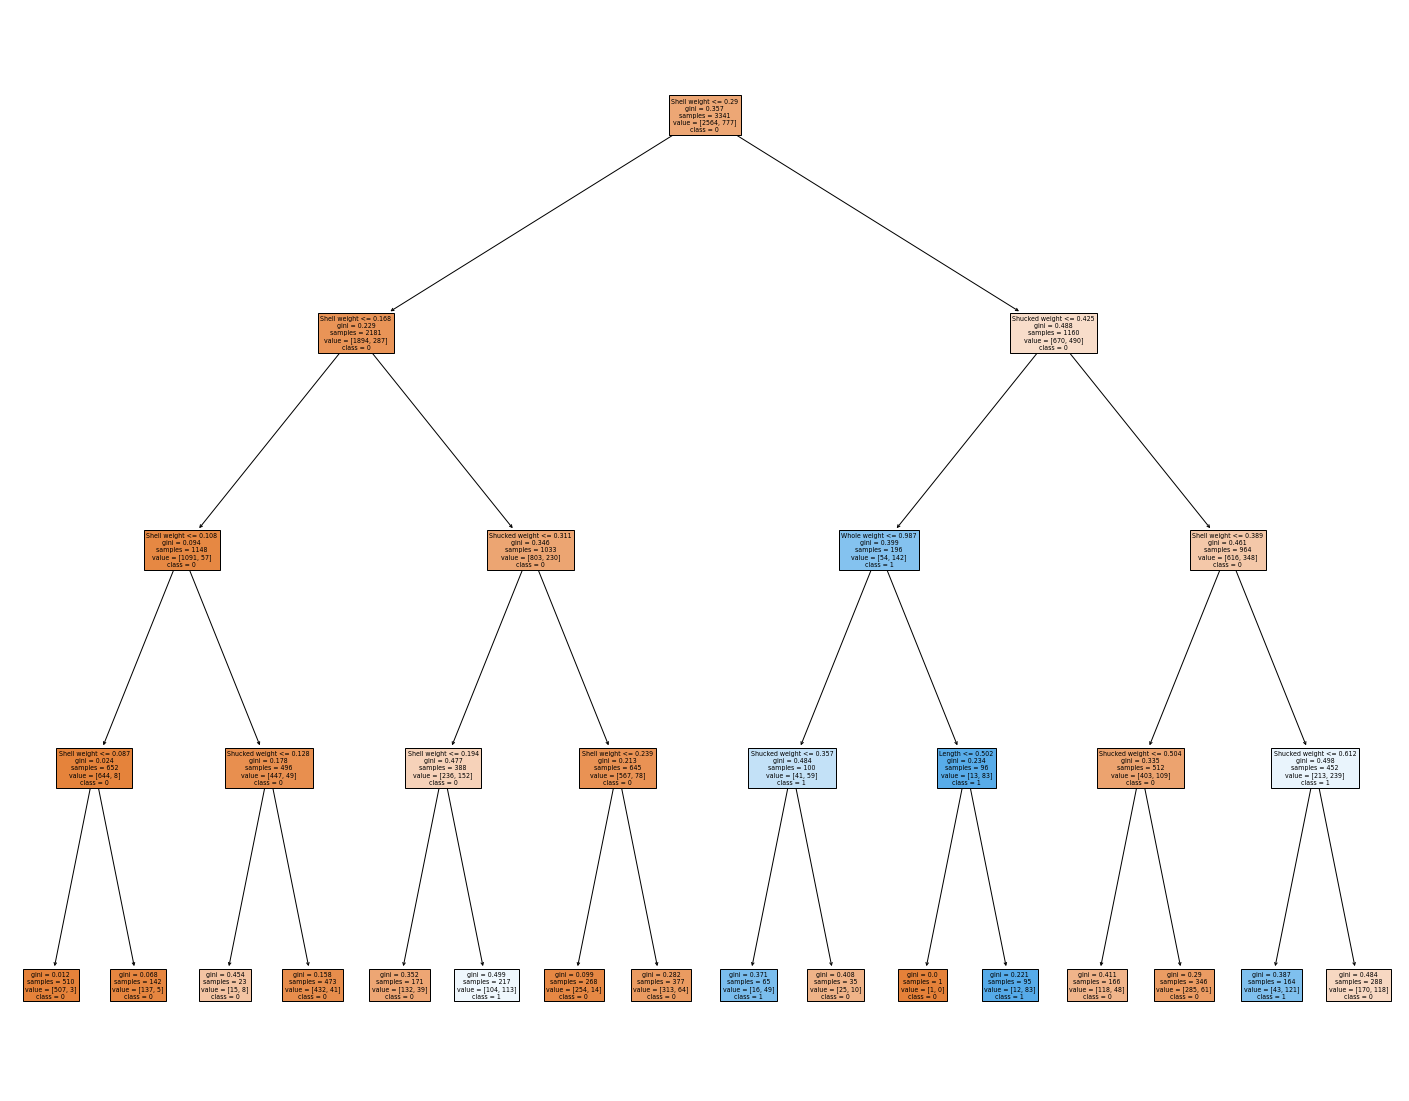

In [13]:
# Implementasi code di sini
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_md4, feature_names=features, class_names=labels, filled=True)

### SOAL 1c

Jika diberikan data X dengan fitur berikut:
* `Length = 0.480`	
* `Diameter = 0.350`	
* `Height = 0.100`	
* `Whole weight = 0.5750`	
* `Shucked weight = 0.1950`	
* `Viscera weight = 0.1245`	
* `Shell weight = 0.200`	


Berdasarkan visualisasi yang dihasilkan pada Soal 1b, apa hasil prediksi `Class` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

> Tulis jawaban Anda di sini

Shell weight < 0.29, 

Shell weight > 0.168, 

Shucked weight < 0.311, 

Shell weight > 0.194, 


Dengan demikian, hasil prediksi classnya adalah 1

## SOAL 2

Implementasikan sebuah model Decision Tree untuk melakukan suatu task klasifikasi yang memprediksi `Class` dari kerang abalone. Implementasi pada soal ini akan menggunakan nilai *hyperparameter* `max_depth = 7` yang berbeda dengan Soal 1. Tujuan dari adanya soal 1 dan 2 adalah agar kita bisa melihat perbedaan hasil yang didapat pada kedua model yang dibangun tersebut.

### SOAL 2a
Bangun model decision tree dengan memberikan nilai pada *hyperparameter* `max_depth = 7`.

In [15]:
# Implementasi code di sini
dt_md7 = DecisionTreeClassifier(max_depth=7)
dt_md7.fit(data_train, label_train)

DecisionTreeClassifier(max_depth=7)

### SOAL 2b
Visualisasikan model decision tree yang didapat pada soal 2a!

In [16]:
# Implementasi code di sini
features = list(data_train.columns)
labels = [str(label) for label in list(label_train['Class'].unique())]

fig = plt.figure(figsize=(50,30), dpi=300)
plot_tree(dt_md7, feature_names=features, class_names=labels, filled=True)




[Text(5470.588235294117, 6370.3125, 'Shell weight <= 0.29\ngini = 0.357\nsamples = 3341\nvalue = [2564, 777]\nclass = 0'),
 Text(2696.829044117647, 5520.9375, 'Shell weight <= 0.168\ngini = 0.229\nsamples = 2181\nvalue = [1894, 287]\nclass = 0'),
 Text(1128.3088235294117, 4671.5625, 'Shell weight <= 0.108\ngini = 0.094\nsamples = 1148\nvalue = [1091, 57]\nclass = 0'),
 Text(495.7720588235294, 3822.1875, 'Shell weight <= 0.087\ngini = 0.024\nsamples = 652\nvalue = [644, 8]\nclass = 0'),
 Text(205.1470588235294, 2972.8125, 'Diameter <= 0.242\ngini = 0.012\nsamples = 510\nvalue = [507, 3]\nclass = 0'),
 Text(136.76470588235293, 2123.4375, 'gini = 0.0\nsamples = 229\nvalue = [229, 0]\nclass = 0'),
 Text(273.52941176470586, 2123.4375, 'Shucked weight <= 0.065\ngini = 0.021\nsamples = 281\nvalue = [278, 3]\nclass = 0'),
 Text(136.76470588235293, 1274.0625, 'Shucked weight <= 0.063\ngini = 0.208\nsamples = 17\nvalue = [15, 2]\nclass = 0'),
 Text(68.38235294117646, 424.6875, 'gini = 0.117\nsam

### SOAL 2c

Jika diberikan data X dengan fitur berikut:
* `Length = 0.400`	
* `Diameter = 0.400`	
* `Height = 0.135`	
* `Whole weight = 0.5505`	
* `Shucked weight = 0.1755`	
* `Viscera weight = 0.1440`	
* `Shell weight = 0.250`	


Berdasarkan visualisasi yang dihasilkan pada Soal 2b, apa hasil prediksi `Class` dari data X?    
**Catatan:** Tidak perlu dilakukan implementasi kode pada bagian ini

> Tulis jawaban Anda di sini

Shell weight < 0.29,

Shell weight > 0.168,

Shucked weight < 0.311,

Shell weight > 0.194,

Shucked weight < 0.242,

Whole weight > 0.477,

Length < 0.498,

Dengan demikian, hasil prediksi classnya adalah 1

## SOAL 3

* Lakukan prediksi terhadap data *testing* (`data_test`) menggunakan model yang sudah dibangun pada soal 1 dan 2.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap aktual label (`label_test`). Metrik evaluasi yang ditampilkan adalah nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (Model mana yang lebih baik? Mengapa model tersebut lebih baik?).

In [17]:
# Implementasi code di sini
# Memprediksi data testing
dt_md4 = DecisionTreeClassifier(max_depth=4)
dt_md4.fit(data_train, label_train)
predicted = dt_md4.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.8038277511961722
Presisi: 0.5655172413793104
Recall: 0.44808743169398907
F1-score: 0.5


In [18]:
# Implementasi code di sini
# Memprediksi data testing
dt_md7 = DecisionTreeClassifier(max_depth=7)
dt_md7.fit(data_train, label_train)
predicted = dt_md7.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

Akurasi: 0.833732057416268
Presisi: 0.6527777777777778
Recall: 0.5136612021857924
F1-score: 0.5749235474006117


> Tuliskan hasil analisis yang dilakukan di sini

Berdasarkan ke-4 metrik tersebut, decision tree dengan max depth 7 adalah yang terbaik dalam membuat model untuk klasifikasi class dari kerang abalone. Hal tersebut dikarenakan max depthnya lebih besar sehingga dapat mencakup kondisi yang lebih banyak atau lebih fleksibel serta max depthnya juga tidak terlalu berlebihan sehingga dapat bekerja baik tidak hanya untuk training, melainkan untuk testing juga. Hal ini bisa dilihat pada contoh kode berikut, dimana setelah max_depth diisi lebih dari 7, ke-4 metrik mengalami penurunan karena model terlalu fleksibel sehingga tidak dapat menggeneralisasi untuk data testing.

In [19]:
for i in range(4, 10):
    dt_md = DecisionTreeClassifier(max_depth=i)
    dt_md.fit(data_train, label_train)
    predicted = dt_md.predict(data_test)

    print("Akurasi", i, ": ", accuracy_score(label_test, predicted))
    print("Presisi", i, ": ", precision_score(label_test, predicted))
    print("Recall", i, ": ", recall_score(label_test, predicted))
    print("F1-score", i, ": ", f1_score(label_test, predicted))
    print()

Akurasi 4 :  0.8038277511961722
Presisi 4 :  0.5655172413793104
Recall 4 :  0.44808743169398907
F1-score 4 :  0.5

Akurasi 5 :  0.8181818181818182
Presisi 5 :  0.6476190476190476
Recall 5 :  0.37158469945355194
F1-score 5 :  0.4722222222222222

Akurasi 6 :  0.8241626794258373
Presisi 6 :  0.6384615384615384
Recall 6 :  0.453551912568306
F1-score 6 :  0.5303514376996804

Akurasi 7 :  0.8313397129186603
Presisi 7 :  0.6438356164383562
Recall 7 :  0.5136612021857924
F1-score 7 :  0.5714285714285715

Akurasi 8 :  0.8169856459330144
Presisi 8 :  0.5892857142857143
Recall 8 :  0.5409836065573771
F1-score 8 :  0.5641025641025642

Akurasi 9 :  0.8145933014354066
Presisi 9 :  0.5875
Recall 9 :  0.5136612021857924
F1-score 9 :  0.5481049562682216



## SOAL 4

Implementasikan sebuah model Random Forest dengan *hyperparameter* `max_depth = 7` dan `n_estimators = 100` untuk *task* klasifikasi `Class` dari kerang abalone.  

## SOAL 5

Implementasikan sebuah model Random Forest dengan *hyperparameter* `max_depth = 7` dan `n_estimators = 50` untuk *task* klasifikasi `Class` dari kerang abalone.  

>Implementasi kode di Soal 6

## SOAL 6

* Lakukan prediksi terhadap data *testing* (`data_test`) menggunakan model yang sudah dibangun pada soal 4 dan 5.
* Lakukan evaluasi pada hasil prediksi yang didapat terhadap aktual label (`label_test`). Metrik evaluasi yang ditampilkan adalah nilai akurasi, presisi, recall, dan F1-Score dari hasil prediksi yang didapat.  
* Bandingkanlah hasil evaluasi yang didapat dan tuliskan analisis singkat terkait dengan perbandingan tersebut (Model mana yang lebih baik? Mengapa model tersebut lebih baik?).

In [20]:
# Implementasi code di sini
rf_md7 = RandomForestClassifier(max_depth=7, n_estimators=100)
rf_md7.fit(data_train, label_train)

# Memprediksi data testing
predicted = rf_md7.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

<ipython-input-20-f926a500d218>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md7.fit(data_train, label_train)


Akurasi: 0.8373205741626795
Presisi: 0.7373737373737373
Recall: 0.3989071038251366
F1-score: 0.5177304964539008


In [21]:
# Implementasi code di sini
rf_md7 = RandomForestClassifier(max_depth=7, n_estimators=50)
rf_md7.fit(data_train, label_train)

# Memprediksi data testing
predicted = rf_md7.predict(data_test)

# Menampilkan metrics evaluasi berupa nilai akurasi, presisi, recall, dan F1-Score
print("Akurasi:", accuracy_score(label_test, predicted))
print("Presisi:", precision_score(label_test, predicted))
print("Recall:", recall_score(label_test, predicted))
print("F1-score:", f1_score(label_test, predicted))

<ipython-input-21-69a890f40e01>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_md7.fit(data_train, label_train)


Akurasi: 0.833732057416268
Presisi: 0.72
Recall: 0.39344262295081966
F1-score: 0.508833922261484


> Tuliskan hasil analisis yang dilakukan di sini

Berdasarkan ke-4 metrik tersebut, decision tree dengan n_estimators 100 adalah yang terbaik dalam membuat model untuk klasifikasi class dari kerang abalone. n_estimator menyatakan jumlah tree yang akan digunakan pada random forest untuk nantinya akan dilakukan voting mana yang terbaik atau diagregasi dalam hasil akhirnya. Dengan demikian, semakin besar n_estimator, maka semakin banyak tree yang akan digunakan pada pembuatan model. Dengan mentraining banyak tree pada satu set training dan dilakukan pemilihan kombinasi tree yang terbaik saja tentunya akan lebih menghasilkan tree yang berkorelasi kuat dan hal itu dapat membuat model menjadi lebih baik untuk prediksi data testing lainnya.